In [10]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import main
import tools.customtool as yft

## Yfinance

In [47]:
df=yft.get_stock_data('AAPL',2*250,'day')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-22 00:00:00-05:00,193.353962,193.581821,191.164647,191.788757,37149600,0.0,0.0
2023-12-26 00:00:00-05:00,191.798670,192.076049,191.025969,191.243912,28919300,0.0,0.0
2023-12-27 00:00:00-05:00,190.689158,191.689703,189.302247,191.342972,48087700,0.0,0.0
2023-12-28 00:00:00-05:00,192.323710,192.838849,191.362784,191.768951,34049900,0.0,0.0
2023-12-29 00:00:00-05:00,192.085938,192.581260,189.936241,190.728760,42672100,0.0,0.0
...,...,...,...,...,...,...,...
2025-12-15 00:00:00-05:00,280.149994,280.149994,272.839996,274.109985,50409100,0.0,0.0
2025-12-16 00:00:00-05:00,272.820007,275.500000,271.790009,274.609985,37648600,0.0,0.0
2025-12-17 00:00:00-05:00,275.010010,276.160004,271.640015,271.839996,50138700,0.0,0.0


In [33]:
print(yft.get_stock_metrics('NBIS'))


Stock Metrics for NBIS:

Market Cap: $22.35B
P/E Ratio: N/A
P/S Ratio: 61.5136
Total Debt: $4.57B
Debt to Equity: 94.974
Latest Annual Revenue: $117.50M
Latest Annual Net Income: $-641.40M
Revenue Growth (YoY): 462.20%
Revenue CAGR (4 Quarters): 40.12%
Net Income CAGR (4 Quarters): -2.66%




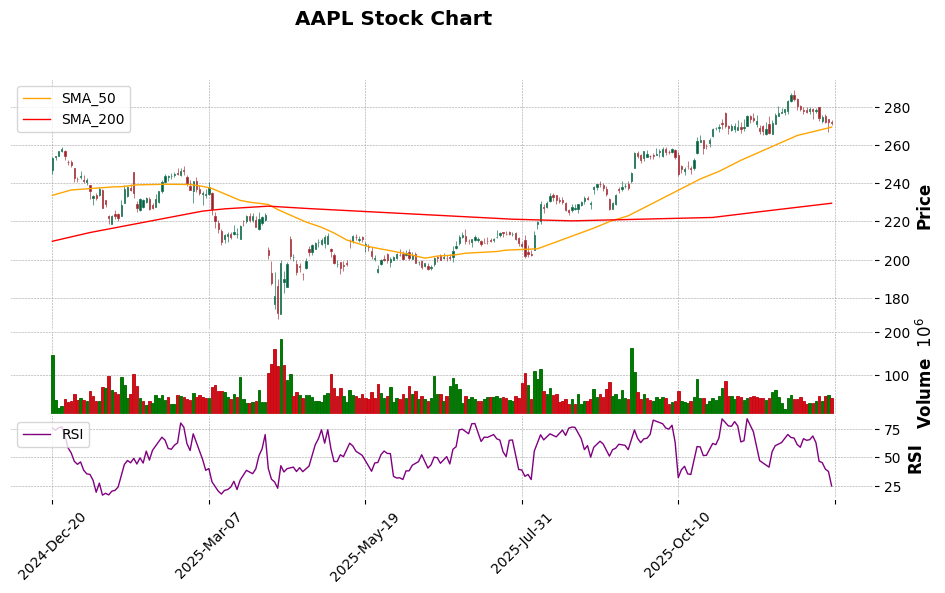

In [51]:
yft.generate_stock_chart(df,'AAPL','outputs/AAPL.png')

## Perplexity

In [6]:
query = """ 
You will be performing a concise fundamental analysis of a stock, focusing on qualitative information and context rather than raw quantitative metrics. The user has already obtained basic financial metrics from other sources and needs you to provide analyst estimates, sector analysis, growth prospects, and other qualitative insights.

Here is the stock to analyze:
<stock_symbol>
AAPL
</stock_symbol>

The user already has quantitative metrics (P/E ratio, P/S ratio, Debt/Equity, revenue, net income, margins, ROE, etc.) from other sources. Your task is to provide:

1. **Key Valuation Metrics Context**: Brief qualitative assessment of whether current valuation ratios (P/E, P/S, Debt/Equity) are high, low, or fair relative to historical averages and industry peers
2. **Recent Financial Performance Context**: Qualitative interpretation of the revenue and net income trends over the last 3 years and TTM - are they accelerating, decelerating, stable? What's driving these trends?
3. **Profitability Context**: Brief assessment of margin trends and ROE - are they improving, declining, or stable? How do they compare to competitors?
4. **Analyst Outlook**: Summary of analyst consensus for the next 12 months including price targets, ratings (buy/hold/sell distribution), and key factors analysts are watching
5. **Sector Analysis**: Brief overview of the sector's current conditions, competitive positioning of this company within the sector, and major industry trends affecting the company
6. **Growth Prospects and Future Outlook**: Forward-looking qualitative assessment covering growth drivers, risks, strategic initiatives, and long-term prospects

Before providing your final analysis, use a <scratchpad> to organize your thoughts about each category and identify the most important qualitative insights to include.

Your output should be:
- Easy to digest and concise
- Organized with clear section headers for each of the 6 categories above
- Use very short bullet points (one line each when possible)
- Focus on qualitative insights, context, and interpretation rather than listing raw numbers
- Avoid jargon where possible; when technical terms are necessary, keep explanations brief
- Limit the entire analysis to what can be read in 2-3 minutes

Format your final response inside <analysis> tags with clear section headers and bullet points.
"""

In [7]:
# query = """Perform a concise fundamental analysis of CVS stock. 
# The output should be easy to digest, with clear metrics, numbers and very short bullet points covering: 
# key valuation metrics (P/E ratio, P/S ratio, Debt/Equity), 
# recent financial performance (last 3 years & TTM of revenue and net income trends, percentage growth), 
# profitability (margins, Return on Equity), 
# a brief analyst outlook for the next year
# and a brief sector analysis and future prospects."""

messages=[
        {"role": "system", "content": "You are a financial research assistant."},
        {"role": "user", "content": query}
]

In [8]:
import os
from litellm import completion


response = completion(
            model="perplexity/sonar-pro",
            messages=messages,
        )

In [9]:
print(response.choices[0].message.content)

<analysis>
<scratchpad>
1) Valuation context
- Forward P/E low 30s, clear premium to S&P and most mega-cap hardware peers, roughly in line or a bit below highest-multiple large-cap software/cloud names.[2]
- Premium vs many hardware/consumer electronics peers but more comparable to “platform + services + AI” leaders; historically Apple trades at a discount to current peak multiples but above its long‑term average.
- P/S likewise elevated vs hardware, closer to high-quality tech platforms.
- Balance sheet still very strong; net cash ~neutral policy, so Debt/Equity headline looks higher than economic risk implies.[2]

2) Recent financial performance context (3y + TTM)
- After a period of flattish to modest revenue growth (smartphone saturation, FX, China softness), FY25 returned to solid mid‑single‑digit+ growth; FY2025 revenue up ~6% YoY to record level, with TTM at all‑time high.[1][2]
- Net income growing faster than revenue thanks to mix shift to high‑margin Services and improved gro